In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# constants
R = 6371. #km

In [3]:
h_max = 150. #km
d_max = np.sqrt(2*R*h_max) #km, approximated 1% error on h_max = 150 km

In [4]:
# cumulative flux from [Cook+78]
a, b = 17.89, 0.534
a_m, b_m = 17.8, 1.335

A_m = 10**(-a_m)
Phi_m = lambda m: A_m * m**(-b_m)*1e10 #meteors/ km^2/s. mass in grams

Phi = lambda M: 10**(-a+b*M+10) #meteors/ km^2/s. M are magnitudes (photographic) valid betwee -2.4 and 12.0

In [62]:
# minimum magnitude: use M = −8.75log (vinf ) − 2.25log (m) + 11.59  from Blaauw+16?
#minimum size (IAU convention/definition)
size = 30*1e-6 #m i.e. 30um
rho = 3000 # kg/m^3
m = size**3.*rho*1e3 #grams

#velocity pre_atmosphere
vinf = 11.2 #km/s
M = -8.75*np.log10(vinf) - 2.25*np.log10(m)+11.59
M 

18.36525100915895

In [40]:
Delta_h = 20 #km
z = 30 #deg

In [66]:
def S(z, Delta_h = Delta_h):
    const = -10+5*np.log10(180/np.pi*3600)
    b_const = -2.5*np.log10(b/(b-0.4))
    Delta_h = Delta_h * 1e5
    z = z*np.pi/180.
    S = -2.5*np.log10(Delta_h)+2.5*np.log10(np.cos(z))+2.5*a-2.5*(b-0.4)*M+const+b_const
    return S
S(20)

37.82356498310207

Text(0, 0.5, 'S [mag/arcsec$^2$]')

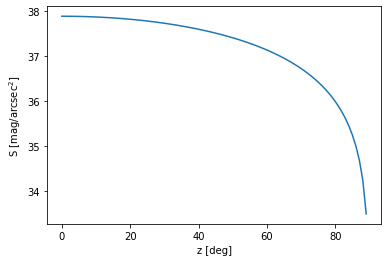

In [67]:
Z = np.arange(0, 90)
S_z = []
for z in Z:
    S_z.append(S(z))
plt.plot(Z, S_z)
plt.xlabel("z [deg]")
plt.ylabel(r"S [mag/arcsec$^2$]")